<a href="https://colab.research.google.com/github/vijayamurugan27/GenerativeAI/blob/main/similarity_cosine_attention.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity


In [ ]:
# Sample vectors
vectors = {
    "vector_1": np.array([1, 2, 3]),
    "vector_2": np.array([2, 3, 4]),
    "vector_3": np.array([4, 0, 0]),
    "vector_4": np.array([0, 4, 0]),
    "vector_5": np.array([0, 0, 4]),
}

In [ ]:


# Query vector
query_vector = np.array([1, 1, 1])

# 1. Cosine Similarity Calculation
def calculate_cosine_similarity(query, vectors):
    similarities = {}
    for name, vector in vectors.items():
        similarity = cosine_similarity(query.reshape(1, -1), vector.reshape(1, -1))[0, 0]
        similarities[name] = similarity
    return similarities

cosine_similarities = calculate_cosine_similarity(query_vector, vectors)

# 2. Retrieve Nearest Vectors based on Cosine Similarity
def get_top_k_similar(similarities, k=3):
    return sorted(similarities.items(), key=lambda item: item[1], reverse=True)[:k]

top_similar_vectors = get_top_k_similar(cosine_similarities)

# 3. Simple Attention Mechanism (Softmax-like scoring)
def attention_scores(query, vectors):
    raw_scores = np.array([np.dot(query, v) for v in vectors.values()])
    attention_weights = np.exp(raw_scores) / np.sum(np.exp(raw_scores)) # this is basically softmax but i'm just spelling it out
    return dict(zip(vectors.keys(), attention_weights))

attention_weights = attention_scores(query_vector, vectors)

# Display results
print("Cosine Similarities:")
for name, similarity in cosine_similarities.items():
    print(f"{name}: {similarity:.4f}")

print("\nTop 3 Similar Vectors based on Cosine Similarity:")
for name, similarity in top_similar_vectors:
    print(f"{name}: {similarity:.4f}")

print("\nAttention Weights:")
for name, weight in attention_weights.items():
    print(f"{name}: {weight:.4f}")


Cosine Similarities:
vector_1: 0.9258
vector_2: 0.9649
vector_3: 0.5774
vector_4: 0.5774
vector_5: 0.5774

Top 3 Similar Vectors based on Cosine Similarity:
vector_2: 0.9649
vector_1: 0.9258
vector_3: 0.5774

Attention Weights:
vector_1: 0.0465
vector_2: 0.9346
vector_3: 0.0063
vector_4: 0.0063
vector_5: 0.0063


In [ ]:
def cosine_similarity_manual(vector_a, vector_b):
    dot_product = np.dot(vector_a, vector_b)
    norm_a = np.linalg.norm(vector_a)
    norm_b = np.linalg.norm(vector_b)
    return dot_product / (norm_a * norm_b) if norm_a > 0 and norm_b > 0 else 0

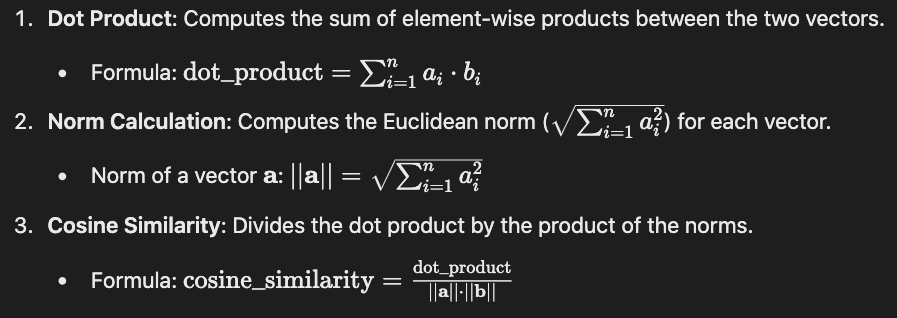

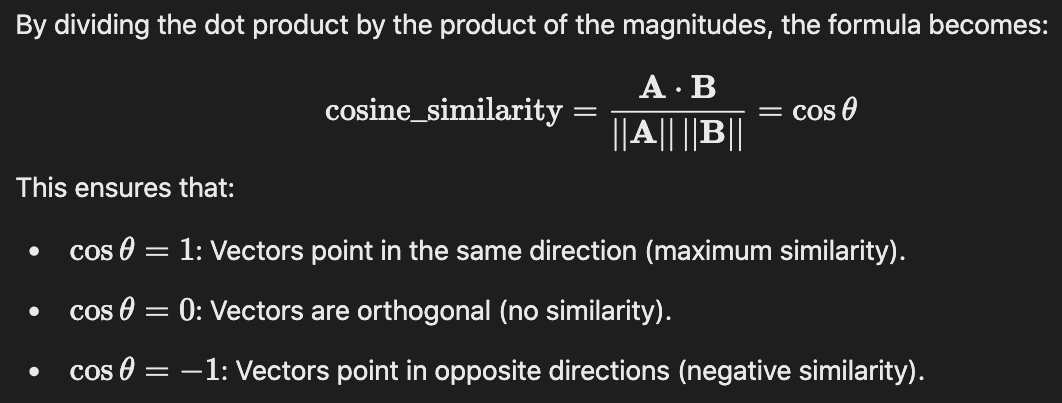

# The power of exponentiation

In [ ]:
0.99 ** 365

0.025517964452291125

In [ ]:
1.0 ** 365

1.0

In [ ]:
1.01 ** 365

37.78343433288728

e ^ x in softmax scales up the large numbers and scales down the small numbers. Hence Attention (with softmax) gives the most likely candidate to pay attention to.

* Cosine Similarity outputs a scalar value for each vector pair (e.g., similarity score between query and each vector).
* Softmax Attention produces a probability distribution over all vectors, assigning relative importance to each.



The commonality lies in their use of the dot product to measure alignment or similarity between vectors. However:

* Cosine similarity focuses only on direction, whereas
* Softmax attention uses exponential scaling and normalization to assign relative importance.